# Week One Training Exercises

In [1]:
# Package Imports

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

## Training Exercise 1.1

In [2]:
# Import the data
df_expend = pd.read_excel("TrainExer11.xls")

### (a) Make two histograms, one of expenditures and the other of age. Make a scatter diagram with expenditures on the vertical axis versus age on the horizontal axis.

Text(0.5, 1.0, 'Expenditures')

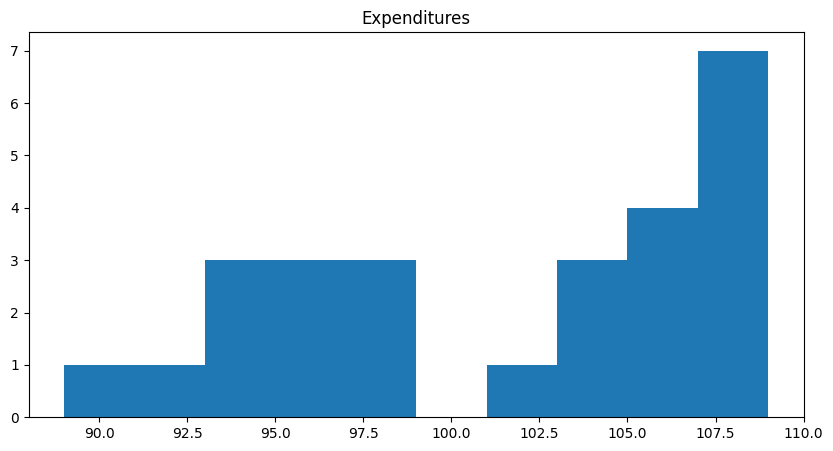

In [3]:
# Make a histogram of expenditures
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(x=df_expend["Expenditures"])
ax.set_title("Expenditures")

Text(0.5, 1.0, 'Age')

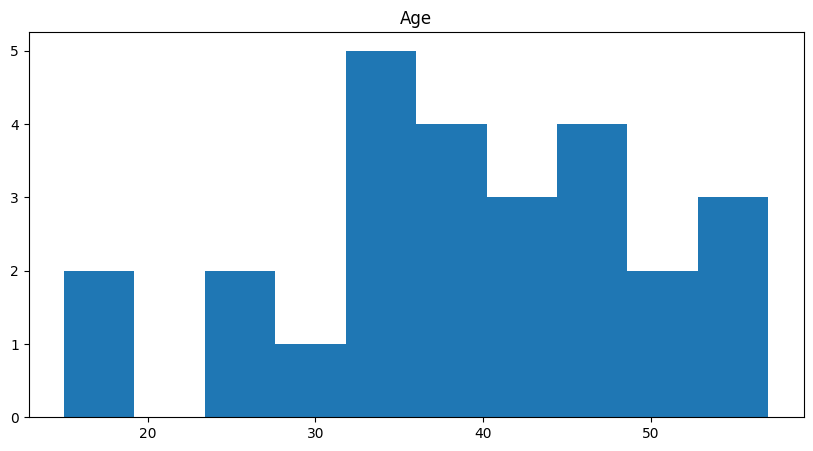

In [4]:
# Make a histogram of age
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(x=df_expend["Age"])
ax.set_title("Age")

Text(0.5, 0, 'Age')

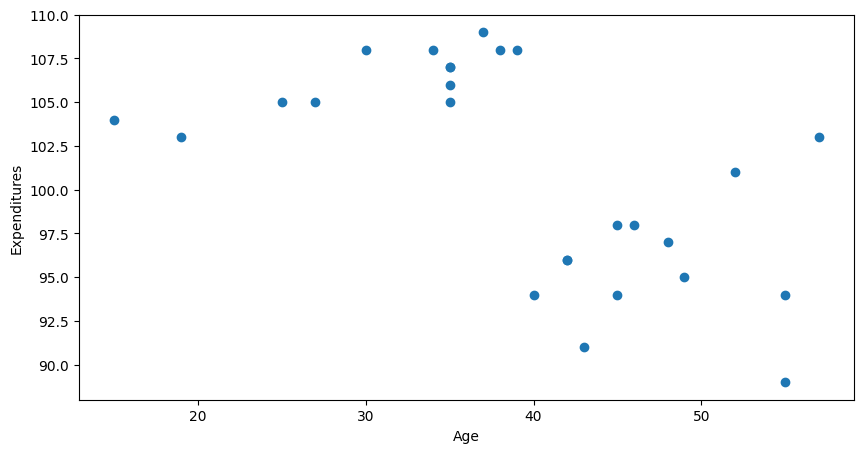

In [5]:
# Make a scatterplot of expenditures on vertical and age on horizontal
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(x=df_expend["Age"], y=df_expend["Expenditures"])
ax.set_ylabel("Expenditures")
ax.set_xlabel("Age")

### (b) In what respect do the data n this scatter diagram look difference from the case of the sales and price data discussed in the lecture?

These data do not have as strong a linear structure as the data in the lecture. These data seem to have two clusters that could be described by younger folk being associated with higher expenditures and older folk being associated with lower expenditures.

### (c) Propose a method to analyze these data in a way that assists the travel agent in making recommendations to future clients.

Based on these data, it seems older folk tend to spend less than younger folk on holiday expenditures. A travel agent might be able to make recommendations based on cost and age of the client. 

### (d) Compute the sample mean of expenditures of all 26 clients

In [6]:
# Compute the sample mean of expenditures
df_expend["Expenditures"].mean()

101.11538461538461

### (e) Compute the two sample means of expenditures, one for clients of age forty or more and the other for clients of age below forty

In [7]:
# Compute the sample means of less than forty and forty and above clients

print("Below 40 Mean Holiday Expenditures: ", df_expend[df_expend["Age"] < 40]["Expenditures"].mean())
print("40 and Above Mean Holiday Expenditures: ", df_expend[df_expend["Age"] >= 40]["Expenditures"].mean())

Below 40 Mean Holiday Expenditures:  106.38461538461539
40 and Above Mean Holiday Expenditures:  95.84615384615384


### (f) What daily expenditures would you predict for a new client of fifty years old? And for someone who is twenty-five years old?

Since there isn't an obvious trend in the 40 or older cohort, I would use the mean for the older cohort to predict the expenditure of a fifty-five year old client. In particular, 95.8.

On the other hand, since the younger cohort has a slight linear trend upward, and since twenty-five years of age is somewhere in the middle of the age span, I might expect something slightly less than 106, but more than 100. If I had to give a point estimate, I might say 105.

## Training Exercise 1.2

### (a)

Show that in the regression model 
$$\log(y_i) = \alpha + \beta \log(x_i) + \epsilon_i$$
the elasticity of $y$ with respect to $x$ is equal to $\beta$ (that is, does not depend on the values of $x_i$ and $y_i$).

**Solution:** If we define elasticity by $\frac{dy}{dx} \cdot \frac{x}{y}$, where $\frac{dy}{dx}$ is understood to be Leibniz notation for the derivative, then we can avoid the dubious use of differential forms like $dy$ and $dx$. With elasticity redefined in this way, we have

$$
\begin{align*}
    \frac{dy}{dx} \cdot \frac{x}{y} &= \frac{ \frac{dy}{dx} }{y} \cdot x \\
    &= \frac{d \ln(y)}{dx} \cdot x \\
    &= \frac{d \ln(y)}{d \ln(x)} \cdot \frac{d \ln(x)}{dx} \cdot x \\
    &= \beta \cdot \frac{1}{x} \cdot x \\
    &= \beta
\end{align*}
$$

### (b)

Determine the elasticity of $y$ with respect to $x$ in the model
$$y_i = \alpha + \beta \ln(x_i) + \epsilon_i$$

**Solution:**

$$
\begin{align*}
    \frac{dy}{dx} \cdot \frac{x}{y} &= \frac{dy}{d \ln(x)} \cdot \frac{d \ln(x)}{dx} \cdot \frac{x}{y} \\
    &= \beta \cdot \frac{1}{x} \cdot \frac{x}{y} \\
    &= \frac{\beta}{y}
\end{align*}
$$

### (c)

Determine the elasticity of $y$ with respect to $x$ in the model

$$\ln(y_i) = \alpha + \beta x_i + \epsilon_i$$

**Solution:**

$$
\begin{align*}
    \frac{dy}{dx} \cdot \frac{x}{y} &= \frac{ \frac{dy}{dx} }{y} \cdot x \\
    &= \frac{d \ln(y)}{dx} \cdot x \\
    &= \beta \cdot x
\end{align*}
$$

## Training Exercise 1.3

In [8]:
# Import the data
df_olympics = pd.read_excel("TrainExer13.xls")

### (a)

Compute $a$ and $b$, and determine the values of $R^2$ and $s$.

In [27]:
# Calculate averages
y = df_olympics.loc[:,"Winning time men"]
y_bar = y.mean()

g = df_olympics.loc[:,"Game"]
g_bar = g.mean()

# Calculate coefficient estimates
b = ((g - g_bar) * (y - y_bar)).sum() / ((g - g_bar) * (g - g_bar)).sum()

a = y_bar - (b * g_bar)

# Calculate model predictions
y_hat = a + (b * g)

# Calculate residuals
e = y - y_hat

# Calculate R-squared
r_sq = 1 - ((e * e).sum()/((y - y_bar) * (y - y_bar)).sum())

# Calculate s
n = y.shape[0]

s_sq = (e * e).sum()/(n-2)

s = np.sqrt(s_sq)

# Print results
print("  a:\t", a)
print("  b:\t", b)
print("R^2:\t", r_sq)
print("  s:\t", s)

  a:	 10.386000000000001
  b:	 -0.03800000000000015
R^2:	 0.6733728599027365
  s:	 0.12282570515227703


### (b)

Are you confident in the predictive ability of this model? Motivate your answer.

**Response:** Yes, I have confidence in this model's predictive ability. The R-squared value isn't too low, and the square root of the variance of the residuals is low relative to the winning times.

### (c)

What prediction do you get for 2008, 2012, and 2016? Compare your predictions with the actual winning times.

In [41]:
# Calculate predictions and gather actuals
future_g = pd.Series([16, 17, 18])

preds = a + (b * future_g)

actuals = pd.Series([9.69, 9.63, 9.81])

# Print results
for i, yr in enumerate(["2008", "2012", "2016"]):
    print("-------- ",yr," --------")
    print("  pred: ", preds.iloc[i].round(2))
    print("actual: ", actuals.iloc[i].round(2))
    print(" resid: ", (actuals.iloc[i] - preds.iloc[i]).round(2))

--------  2008  --------
  pred:  9.78
actual:  9.69
 resid:  -0.09
--------  2012  --------
  pred:  9.74
actual:  9.63
 resid:  -0.11
--------  2016  --------
  pred:  9.7
actual:  9.81
 resid:  0.11
